# Project New York
## Recommender Simulation

## Business Problem

Being New York City one of the largest cities in the United States and in the world, known as a great land of opportunities, makes it a perfect place for a venue idea. Even due to its large populated boroughs such as Manhattan that could create a positive impact on sales, costs can be very high especially around downtown and its surrounding areas. The purpose of this project is to analyze the 5 different boroughs that compound New York City, its clusters, the number of neighborhoods per cluster, number of venues per cluster. Bringing to topic multiculturalism, ethnicity plays a vital role into selecting which type of venue will be a good fit. For example, Downtown Manhattan is best known for its italian restaurants and pizza places, on the other hand, we have Chinatown and we sure know what type of food is being served. 

New York City Boroughs:

1. Manhattan
2. Bronx
3. Brooklyn
4. Queens
5. Staten Island

## Data Overview

As mentioned before, the main purpose of this project is to analyze neighborhoods that compound all 5 boroughs from the city of New York and conclude through a series of analyses which areas or area and which venue category or categories will best fit in New York City.

The data used on this project is based alone on New York City. Through Foursquare, data such as venues, venues categories and coordinates will be used alongside neighborhoods latitudes and longitudes coordinates to create a merged dataset that will allow the audience to comprehend throughout geospatial data the geography of New York City, population density, and number of local venues in each neighborhood and borough. Machine learning clustering analyses allows to create data visualization of the city neighborhoods and venues dataset and to conclude which venues could best fit an area based on venues frequency and population.

In [169]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
# !conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import folium 
import lxml

print('Libraries imported.')

Libraries imported.


In [7]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [8]:
neighborhoods_data = newyork_data['features']

In [9]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
newyork_n = pd.DataFrame(columns=column_names)

In [13]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    newyork_n = newyork_n.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [14]:
newyork_n.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [23]:
print(newyork_n.shape[0])
print(len(newyork_n['Borough'].unique()))

306
5


In [24]:
geolocator = Nominatim(user_agent = 'foursquare_agent')
location = geolocator.geocode('New York City, New York')
latitude = location.latitude
longitude = location.longitude
print('Geographical Coordinates of New York City: {}, {}'.format(location.latitude, location.longitude))

Geographical Coordinates of New York City: 40.7127281, -74.0060152


In [194]:
borough_color = {'Bronx':'red', 'Manhattan':'blue', 'Brooklyn':'black', 'Queens':'yellow', 'Staten Island':'purple'}

In [197]:
ny_map = folium.Map(location =[latitude, longitude], zoom_start = 10)

for lat, lng, borough, neighborhood in zip (newyork_n['Latitude'],newyork_n['Longitude'],
                                            newyork_n['Borough'],newyork_n['Neighborhood']):
    label_text = borough + ' - ' + neighborhood
    label = folium.Popup(label_text)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color = borough_color[borough],
        fill_color=borough_color[borough],
        fill_opacity=0.7).add_to(ny_map)

ny_map

In [32]:
print(newyork_n['Borough'].unique())

['Bronx' 'Manhattan' 'Brooklyn' 'Queens' 'Staten Island']


In [213]:
CLIENT_ID = '3FBPDHHS253YALJVYVEBK4P4HYTTKIBNWC4ZEJDMN1F2NZJ4' 
CLIENT_SECRET = 'ROOGQGRZZQMZ1PB5K5BV4HBV2A2YUZRKVLF4RMBS13MPLGJL' 
VERSION = '20190530' 

In [204]:
LIMIT = 2000
radius = 10000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=3FBPDHHS253YALJVYVEBK4P4HYTTKIBNWC4ZEJDMN1F2NZJ4&client_secret=MS1XTTDXG1ZKNGDDNJ1JET3TCB0DQOA3JIMIG0VXUQG0SOI2&ll=40.7127281,-74.0060152&v=20190530&radius=10000&limit=2000'

In [205]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fbb18905111134f6b6caced'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'New York',
  'headerFullLocation': 'New York',
  'headerLocationGranularity': 'city',
  'totalResults': 236,
  'suggestedBounds': {'ne': {'lat': 40.80272819000009,
    'lng': -73.8875016126839},
   'sw': {'lat': 40.62272800999991, 'lng': -74.12452878731608}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5d5f24ec09484500079aee00',
       'name': 'Los Tacos No. 1',
       'location': {'address': '136 Church St',
        'lat': 40.714267,
        'lng': -74.008756,
        'labeledLatLngs': [{'label': 'display',
          'lat': 40

In [206]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [207]:
import json 
from pandas.io.json import json_normalize 

venues = results['response']['groups'][0]['items']  
newyork_nearby_venues = pd.json_normalize(venues) 


filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
newyork_nearby_venues = newyork_nearby_venues.loc[:, filtered_columns]


newyork_nearby_venues['venue.categories'] = newyork_nearby_venues.apply(get_category_type, axis=1)


newyork_nearby_venues.columns = [col.split(".")[-1] for col in newyork_nearby_venues.columns]

newyork_nearby_venues.head(10)

name     categories        lat        lng
0              Los Tacos No. 1     Taco Place  40.714267 -74.008756
1           Aire Ancient Baths            Spa  40.718141 -74.004941
2     9/11 Memorial North Pool  Memorial Site  40.712077 -74.013187
3       One World Trade Center       Building  40.713069 -74.013133
4                    Crown Shy     Restaurant  40.706187 -74.007490
5                   sweetgreen    Salad Place  40.705626 -74.008282
6        The Rooftop @ Pier 17    Music Venue  40.705463 -74.001598
7  Battery Park City Esplanade           Park  40.711622 -74.017907
8  Pier 25 - Hudson River Park           Park  40.720193 -74.012950
9   Nelson A. Rockefeller Park           Park  40.717095 -74.016716

In [208]:
newyork_nearby_venues.shape

(100, 4)

In [210]:
print('{} venues were returned by Foursquare'.format(newyork_nearby_venues.shape[0]))

100 venues were returned by Foursquare


In [214]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
       
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)       

In [217]:
ny_venues = getNearbyVenues(names=newyork_n['Neighborhood'],
                                   latitudes=newyork_n['Latitude'],
                                   longitudes=newyork_n['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [218]:
ny_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

              Venue  Venue Latitude  Venue Longitude  Venue Category  
0  Lollipops Gelato       40.894123       -73.845892    Dessert Shop  
1          Rite Aid       40.896649       -73.844846        Pharmacy  
2         Walgreens       40.896528       -73.844700        Pharmacy  
3           Dunkin'       40.890459       -73.849089      Donut Shop  
4  Carvel Ice Cream       40.890487       -73.848568  Ice Cream Shop

In [220]:
print('There are {} neighborhoods.'.format(len(ny_venues['Neighborhood'].unique())))
print('There are {} uniques categories.'.format(len(ny_venues['Venue Category'].unique())))

There are 302 neighborhoods.
There are 436 uniques categories.


In [327]:
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")


ny_onehot['Neighborhood'] = ny_venues['Neighborhood'] 


fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns]

ny_onehot.head()

Yoga Studio  Accessories Store  Adult Boutique  Afghan Restaurant  \
0            0                  0               0                  0   
1            0                  0               0                  0   
2            0                  0               0                  0   
3            0                  0               0                  0   
4            0                  0               0                  0   

   African Restaurant  Airport Terminal  American Restaurant  Antique Shop  \
0                   0                 0                    0             0   
1                   0                 0                    0             0   
2                   0                 0                    0             0   
3                   0                 0                    0             0   
4                   0                 0                    0             0   

   Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0       0                 0                       0            0           0   
1       0                 0                       0            0           0   
2       0                 0                       0            0           0   
3       0                 0                       0            0           0   
4       0                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auditorium  Australian Restaurant  Austrian Restaurant  \
0                   0           0                      0                    0   
1                   0           0                      0                    0   
2                   0           0                      0                    0   
3                   0           0                      0                    0   
4                   0           0                      0                    0   

   Auto Garage  Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0            0                0          0           0           0       0   
1            0                0          0           0           0       0   
2            0                0          0           0           0       0   
3            0                0          0           0           0       0   
4            0                0          0           0           0       0   

   Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  Bath House  \
0     0    0               0                 0                 0           0   
1     0    0               0                 0                 0           0   
2     0    0               0                 0                 0           0   
3     0    0               0                 0                 0           0   
4     0    0               0                 0                 0           0   

   Beach  Beach Bar  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0      0          0                0         0            0           0   
1      0          0                0         0            0           0   
2      0          0                0         0            0           0   
3      0          0                0         0            0           0   
4      0          0                0         0            0           0   

   Big Box Store  Bike Rental / Bike Share  Bike Shop  Bike Trail  Bistro  \
0              0                         0          0           0       0   
1              0                         0          0           0       0   
2              0                         0          0           0       0   
3              0           

In [650]:
ny_venues_grouped = ny_onehot.groupby('Neighborhood').mean().reset_index()
ny_venues_grouped.head()

Neighborhood  Yoga Studio  Accessories Store  Adult Boutique  \
0       Allerton          0.0                0.0             0.0   
1       Annadale          0.0                0.0             0.0   
2  Arden Heights          0.0                0.0             0.0   
3      Arlington          0.0                0.0             0.0   
4       Arrochar          0.0                0.0             0.0   

   Afghan Restaurant  African Restaurant  Airport Terminal  \
0                0.0                 0.0               0.0   
1                0.0                 0.0               0.0   
2                0.0                 0.0               0.0   
3                0.0                 0.0               0.0   
4                0.0                 0.0               0.0   

   American Restaurant  Antique Shop  Arcade  Arepa Restaurant  \
0             0.000000           0.0     0.0               0.0   
1             0.166667           0.0     0.0               0.0   
2             0.000000           0.0     0.0               0.0   
3             0.000000           0.0     0.0               0.0   
4             0.000000           0.0     0.0               0.0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                     0.0     0.029412         0.0                  0.0   
1                     0.0     0.000000         0.0                  0.0   
2                     0.0     0.000000         0.0                  0.0   
3                     0.0     0.000000         0.0                  0.0   
4                     0.0     0.000000         0.0                  0.0   

   Arts & Entertainment  Asian Restaurant  Athletics & Sports  Auditorium  \
0                   0.0               0.0            0.000000         0.0   
1                   0.0               0.0            0.000000         0.0   
2                   0.0               0.0            0.000000         0.0   
3                   0.0               0.0            0.000000         0.0   
4                   0.0               0.0            0.041667         0.0   

   Australian Restaurant  Austrian Restaurant  Auto Garage  Automotive Shop  \
0                    0.0                  0.0          0.0              0.0   
1                    0.0                  0.0          0.0              0.0   
2                    0.0                  0.0          0.0              0.0   
3                    0.0                  0.0          0.0              0.0   
4                    0.0                  0.0          0.0              0.0   

   BBQ Joint  Baby Store  Bagel Shop    Bakery  Bank       Bar  \
0        0.0         0.0    0.000000  0.029412   0.0  0.000000   
1        0.0         0.0    0.083333  0.000000   0.0  0.000000   
2        0.0         0.0    0.000000  0.000000   0.0  0.000000   
3        0.0         0.0    0.000000  0.000000   0.0  0.000000   
4        0.0         0.0    0.041667  0.000000   0.0  0.041667   

   Baseball Field  Baseball Stadium  Basketball Court  Bath House  Beach  \
0             0.0               0.0               0.0         0.0    0.0   
1             0.0               0.0               0.0         0.0    0.0   
2             0.0               0.0               0.0         0.0    0.0   
3             0.0               0.0               0.0         0.0    0.0   
4             0.0               0.0               0.0         0.0    0.0   

   Beach Bar  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0        0.0              0.0       0.0          0.0         0.0   
1        0.0              0.0       0.0          0.0         0.0   
2        0.0              0.0       0.0          0.0         0.0   
3        0.0              0.0       0.0          0.0         0.0   
4        0.0              0.0       0.0          0.0         0.0   

   Big Box Store  Bike Rental / Bike Share  Bike Shop  Bike Trail  Bistro  \
0            0.0                       0.0        0.0         0.0     0.0   
1            0.0   

In [329]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [330]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']


columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


ny_venues_sorted = pd.DataFrame(columns=columns)
ny_venues_sorted['Neighborhood'] = ny_venues_grouped['Neighborhood']

for ind in np.arange(ny_venues_grouped.shape[0]):
    ny_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ny_venues_grouped.iloc[ind, :], num_top_venues)

ny_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Allerton           Pizza Place    Chinese Restaurant   
1       Annadale   American Restaurant           Pizza Place   
2  Arden Heights         Deli / Bodega              Pharmacy   
3      Arlington              Bus Stop               Gay Bar   
4       Arrochar              Bus Stop         Deli / Bodega   

  3rd Most Common Venue  
0                   Spa  
1          Dance Studio  
2            Smoke Shop  
3         Boat or Ferry  
4    Italian Restaurant

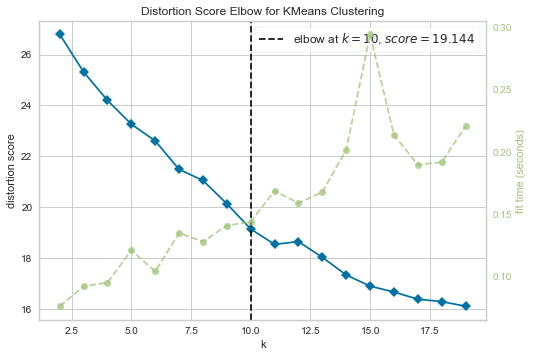

In [463]:
ny_grouped_cluster = ny_venues_grouped.drop('Neighborhood',1)
X = ny_grouped_cluster
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(X)
visualizer.show()

In [505]:
kclusters = 10
kmeans = KMeans(n_clusters = kclusters, random_state=4).fit(ny_grouped_cluster)
kmeans.labels_[:21]

array([3, 3, 3, 4, 4, 7, 7, 3, 7, 7, 7, 7, 7, 7, 7, 0, 3, 7, 7, 7, 7])

In [506]:
ny_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ny_merged = newyork_n
ny_merged = ny_merged.join(ny_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
ny_merged.head()

Borough Neighborhood   Latitude  Longitude  Cluster Labels  \
0   Bronx    Wakefield  40.894705 -73.847201               3   
1   Bronx   Co-op City  40.874294 -73.829939               3   
2   Bronx  Eastchester  40.887556 -73.827806               3   
3   Bronx    Fieldston  40.895437 -73.905643               7   
4   Bronx    Riverdale  40.890834 -73.912585               4   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  
0              Pharmacy          Dessert Shop            Donut Shop  
1           Bus Station        Baseball Field         Grocery Store  
2  Caribbean Restaurant           Bus Station         Metro Station  
3                 River                 Plaza  Medical Supply Store  
4                  Park            Playground                   Gym

In [816]:
import matplotlib.cm as cm
import matplotlib.colors as colors
ny_clusters = folium.Map(location = [latitude, longitude], zoom_start=10)


x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster, borough in zip(ny_merged['Latitude'], ny_merged['Longitude'], ny_merged['Neighborhood'], ny_merged['Cluster Labels'], ny_merged['Borough']):
    label = folium.Popup(str(borough) + " " + str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(ny_clusters)
    
ny_clusters

In [1]:
cluster_0 = ny_merged.loc[ny_merged['Cluster Labels'] == 0, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

NameError: name 'ny_merged' is not defined

In [509]:
cluster_1 = ny_merged.loc[ny_merged['Cluster Labels'] == 1, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

In [510]:
cluster_2 = ny_merged.loc[ny_merged['Cluster Labels'] == 2, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

In [511]:
cluster_3 = ny_merged.loc[ny_merged['Cluster Labels'] == 3, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

In [1087]:
cluster_4 = ny_merged.loc[ny_merged['Cluster Labels'] == 4, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

In [513]:
cluster_5 = ny_merged.loc[ny_merged['Cluster Labels'] == 5, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

In [514]:
cluster_6 = ny_merged.loc[ny_merged['Cluster Labels'] == 6, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

In [632]:
cluster_7 = ny_merged.loc[ny_merged['Cluster Labels'] == 7, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

In [516]:
cluster_8 = ny_merged.loc[ny_merged['Cluster Labels'] == 8, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

In [517]:
cluster_9 = ny_merged.loc[ny_merged['Cluster Labels'] == 9, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

In [519]:
ny_merged.head()

Borough Neighborhood   Latitude  Longitude  Cluster Labels  \
0   Bronx    Wakefield  40.894705 -73.847201               3   
1   Bronx   Co-op City  40.874294 -73.829939               3   
2   Bronx  Eastchester  40.887556 -73.827806               3   
3   Bronx    Fieldston  40.895437 -73.905643               7   
4   Bronx    Riverdale  40.890834 -73.912585               4   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  
0              Pharmacy          Dessert Shop            Donut Shop  
1           Bus Station        Baseball Field         Grocery Store  
2  Caribbean Restaurant           Bus Station         Metro Station  
3                 River                 Plaza  Medical Supply Store  
4                  Park            Playground                   Gym

In [520]:
n = 5
ny_mostcommon = ny_merged['1st Most Common Venue'].value_counts()[:n].sort_values(ascending=False)
ny_mostcommon.head()

Pizza Place           27
Italian Restaurant    25
Deli / Bodega         24
Bar                   17
Chinese Restaurant    15
Name: 1st Most Common Venue, dtype: int64

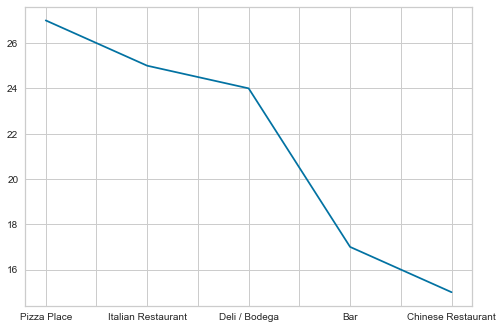

In [820]:
ny_mostcommon.plot()

In [521]:
boroughs_common = pd.DataFrame(ny_merged.groupby(['Borough','1st Most Common Venue']).size().reset_index(name='Frequency'))
boroughs_common

Borough      1st Most Common Venue  Frequency
0            Bronx                        Bar          1
1            Bronx                Bus Station          6
2            Bronx       Caribbean Restaurant          2
3            Bronx         Chinese Restaurant          3
4            Bronx              Deli / Bodega          5
5            Bronx                      Diner          1
6            Bronx                 Donut Shop          2
7            Bronx       Fast Food Restaurant          2
8            Bronx     Furniture / Home Store          1
9            Bronx              Grocery Store          2
10           Bronx         Italian Restaurant          3
11           Bronx                  Juice Bar          1
12           Bronx          Mobile Phone Shop          1
13           Bronx                       Park          3
14           Bronx                   Pharmacy          2
15           Bronx                Pizza Place         11
16           Bronx          Recreation Center          1
17           Bronx                      River          1
18           Bronx             Sandwich Place          2
19           Bronx                Supermarket          1
20           Bronx     Thrift / Vintage Store          1
21        Brooklyn                 Bagel Shop          2
22        Brooklyn                       Bank          4
23        Brooklyn                        Bar          8
24        Brooklyn             Baseball Field          1
25        Brooklyn           Baseball Stadium          1
26        Brooklyn                      Beach          1
27        Brooklyn                       Café          1
28        Brooklyn       Caribbean Restaurant          6
29        Brooklyn         Child Care Service          1
30        Brooklyn         Chinese Restaurant          3
31        Brooklyn                Coffee Shop          5
32        Brooklyn               Dance Studio          1
33        Brooklyn              Deli / Bodega          4
34        Brooklyn             Discount Store          1
35        Brooklyn                 Donut Shop          1
36        Brooklyn                 Food Truck          1
37        Brooklyn        Fried Chicken Joint          2
38        Brooklyn              Grocery Store          3
39        Brooklyn            Harbor / Marina          1
40        Brooklyn             Ice Cream Shop          1
41        Brooklyn         Italian Restaurant          5
42        Brooklyn  Latin American Restaurant          1
43        Brooklyn                     Lounge          1
44        Brooklyn                       Park          2
45        Brooklyn                Pizza Place          6
46        Brooklyn                 Playground          3
47        Brooklyn                       Pool          1
48        Brooklyn         Russian Restaurant          1
49        Brooklyn         Seafood Restaurant          1
50        Brooklyn         Turkish Restaurant          1
51       Manhattan                     Bakery          1
52       Manhattan                        Bar          3
53       Manhattan                       Café          1
54       Manhattan         Chinese Restaurant          2
55       Manhattan             Clothing Store          1
56       Manhattan                Coffee Shop          6
57       Manhattan             Discount Store          1
58       Manhattan                    Exhibit          1
59       Manhattan                      Hotel          2
60       Manhattan         Italian Restaurant          8
61       Manhattan          Korean Restaurant          2
62       Manhattan         Mexican Restaurant          2
63       Manhattan                       Park          5
64       Manhattan                Pizza Place          1
65       Manhattan                 Playground          1
66       Manhattan                      Plaza          1
67       Manhattan                        Spa          1
68       Manhattan                    Theater          1
69          Queens   

In [638]:
clusters_common = pd.DataFrame(ny_merged.groupby(['Cluster Labels', '1st Most Common Venue']).size().reset_index(name='Frequency'))
clusters_common

Cluster Labels      1st Most Common Venue  Frequency
0                 0                 Playground          2
1                 1                        Bar          1
2                 2              Boat or Ferry          1
3                 2              Grocery Store          1
4                 3        American Restaurant          1
5                 3        Arts & Crafts Store          1
6                 3           Asian Restaurant          1
7                 3                 Bagel Shop          2
8                 3                       Bank          4
9                 3                        Bar          3
10                3             Baseball Field          1
11                3           Baseball Stadium          1
12                3               Burger Joint          1
13                3                Bus Station         10
14                3       Caribbean Restaurant         12
15                3         Chinese Restaurant          7
16                3              Deli / Bodega         12
17                3                      Diner          2
18                3                 Donut Shop          1
19                3       Fast Food Restaurant          1
20                3        Fried Chicken Joint          1
21                3              Grocery Store          4
22                3    Health & Beauty Service          1
23                3             Ice Cream Shop          1
24                3          Indian Restaurant          1
25                3         Italian Restaurant          1
26                3  Latin American Restaurant          1
27                3              Metro Station          1
28                3                       Park          1
29                3                   Pharmacy          4
30                3                Pizza Place         20
31                3                 Playground          1
32                3          Recreation Center          1
33                3         Salon / Barbershop          1
34                3             Sandwich Place          2
35                3                Supermarket          1
36                4         African Restaurant          1
37                4                 Bagel Shop          1
38                4                        Bar          1
39                4             Baseball Field          1
40                4                   Bus Stop          8
41                4              Deli / Bodega          3
42                4            Harbor / Marina          1
43                4               Intersection          1
44                4         Italian Restaurant          1
45                4        Monument / Landmark          1
46                4                       Park          3
47                4                 Playground          1
48                4          Recreation Center          1
49                4              Women's Store          1
50                5                      Beach          1
51                6                       Park          2
52                7                 Bagel Shop          1
53                7                     Bakery          2
54                7                       Bank          3
55                7                        Bar         12
56                7             Baseball Field          1
57                7                      Beach          8
58                7              Big Box Store          1
59                7                       Café          3
60                7         Child Care Service          1
61                7         Chinese Restaurant          8
62                7             Clothing Store          4
63                7                Coffee Shop         13
64                7  College Academic Building          1
65                7          Convenience Store          1
66                7             Cosmetics Shop          1
67                7               Dance Studio          2
68 

In [633]:
boroughs_common.rename(columns={'1st Most Common Venue':'Venues'},inplace=True) 
boroughs_common = boroughs_common.sort_values(['Borough','Frequency'], ascending=False)
boroughs_top5 = boroughs_common.sort_values(['Borough','Frequency'], ascending=False).groupby('Borough').head(5)
boroughs_top5.head()

Borough              Venues  Frequency
122  Staten Island            Bus Stop          8
146  Staten Island         Pizza Place          7
137  Staten Island  Italian Restaurant          6
128  Staten Island       Deli / Bodega          4
115  Staten Island          Bagel Shop          2

In [643]:
# clusters_common.rename(columns={'1st Most Common Venue':'Venues'}, inplace=True)
clusters_top5 = clusters_common.sort_values(['Cluster Labels','Frequency'], ascending=False).groupby('Cluster Labels').head(5)
clusters_top5 = clusters_top5.reset_index(drop=True)
clusters_top5.head()

Cluster Labels            Venues  Frequency
0               9      Dance Studio          1
1               9     Deli / Bodega          1
2               9           Dog Run          1
3               9  Recording Studio          1
4               8              Pool          1

In [646]:
# nn_cluster = pd.DataFrame(ny_merged.groupby('Cluster Labels').count()['Neighborhood']).reset_index('Cluster Labels')
nn_cluster['Neighborhood Ratio'] = nn_cluster['Neighborhood'] / nn_cluster['Neighborhood'].sum()
nn_cluster['Neighborhood Ratio'] = pd.Series(["{0:.2f}%".format(val*100) for val in nn_cluster['Neighborhood Ratio']])
nn_cluster['Venues'] = ny_merged.groupby('Cluster Labels').count()

nn_cluster

Cluster Labels  Neighborhood Neighborhood Ratio
0               0             2              0.65%
1               1             1              0.33%
2               2             2              0.65%
3               3           102             33.33%
4               4            25              8.17%
5               5             1              0.33%
6               6             2              0.65%
7               7           166             54.25%
8               8             1              0.33%
9               9             4              1.31%

In [629]:
print(nn_cluster['Neighborhood'].sum())

306


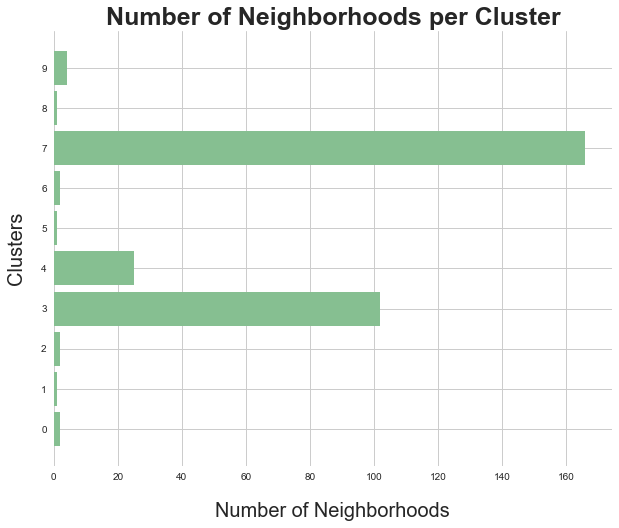

In [612]:
import matplotlib.pyplot as plt
neighborhoods = nn_cluster['Neighborhood']
clusters = nn_cluster['Cluster Labels']

fig, ax = plt.subplots(figsize=(10,8))
width = 0.85
ind = np.arange(len(neighborhoods))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


ax.barh(ind, neighborhoods, width, color='#86bf91')
ax.set_yticks(ind)
ax.set_yticklabels(clusters)
plt.title('Number of Neighborhoods per Cluster', fontsize = 25, weight = 'bold')
plt.xlabel('Number of Neighborhoods', fontsize = 20, labelpad=20)
plt.ylabel('Clusters', fontsize = 20, labelpad = 15)
plt.show()

#### As above graph shows, Clusters 3 and 7 compound almost 90% of 306 neighborhoods. Cluster 7 major grouping resides in center Manhattan and northern Brooklyn where a vast density of Neighborhoods are located.

In [774]:
nyvenuescount = ny_venues.groupby('Neighborhood').count()
nyvenuescount.head()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                          
Allerton                          34                      34     34   
Annadale                          12                      12     12   
Arden Heights                      6                       6      6   
Arlington                          7                       7      7   
Arrochar                          24                      24     24   

               Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                    
Allerton                   34               34              34  
Annadale                   12               12              12  
Arden Heights               6                6               6  
Arlington                   7                7               7  
Arrochar                   24               24              24

In [776]:
nyvenuescount = nyvenuescount.join(ny_merged.set_index('Neighborhood'), on=('Neighborhood'))
nyvenuescount = nyvenuescount.reset_index()
nyvenuescount = nyvenuescount[['Cluster Labels', 'Venue']]
nyvenuescount = nyvenuescount.rename(columns={'Venue':'Venues'})
nyvenuescount = nyvenuescount.groupby(['Cluster Labels'])['Venues'].sum().reset_index()
nyvenuescount

Cluster Labels  Venues
0               0       8
1               1       1
2               2       3
3               3    2185
4               4     311
5               5       7
6               6       2
7               7    8294
8               8       1
9               9      20

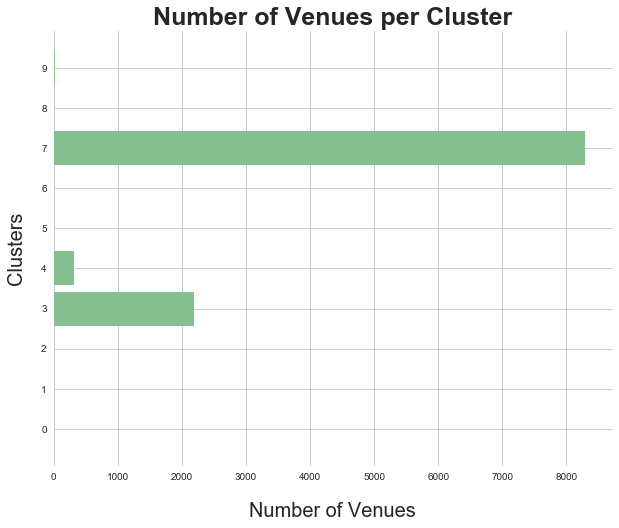

In [777]:
venues = nyvenuescount['Venues']
clusters = nyvenuescount['Cluster Labels']

fig, ax = plt.subplots(figsize=(10,8))
width = 0.85
ind = np.arange(len(venues))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


ax.barh(ind, venues, width, color='#86bf91')
ax.set_yticks(ind)
ax.set_yticklabels(clusters)
plt.title('Number of Venues per Cluster', fontsize = 25, weight = 'bold')
plt.xlabel('Number of Venues', fontsize = 20, labelpad=20)
plt.ylabel('Clusters', fontsize = 20, labelpad = 15)
plt.show()

In [800]:
nycnv = nn_cluster.join(nyvenuescount.set_index('Cluster Labels'), on=('Cluster Labels'))
nycnv.drop(['Neighborhood Ratio'], inplace=True, axis=1)
nycnv['Venue-Neighborhood Ratio'] = nycnv['Venues'] / nycnv['Neighborhood']
nycnv['Venue-Neighborhood Ratio'] = nycnv['Venue-Neighborhood Ratio'].round(decimals=0)

In [801]:
nycnv

Cluster Labels  Neighborhood  Venues  Venue-Neighborhood Ratio
0               0             2       8                       4.0
1               1             1       1                       1.0
2               2             2       3                       2.0
3               3           102    2185                      21.0
4               4            25     311                      12.0
5               5             1       7                       7.0
6               6             2       2                       1.0
7               7           166    8294                      50.0
8               8             1       1                       1.0
9               9             4      20                       5.0

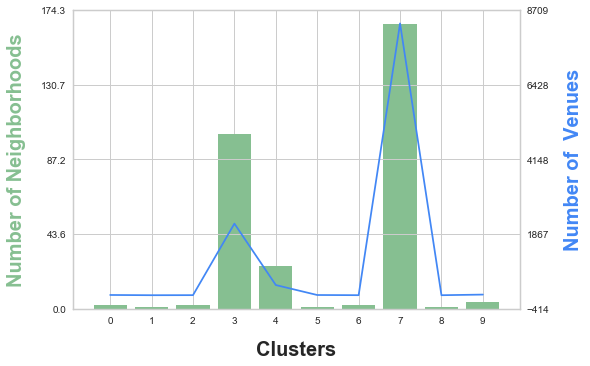

In [814]:
clusters = nycnv['Cluster Labels']
neighborhoods = nycnv['Neighborhood']
venues = nycnv['Venues']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(clusters, neighborhoods, color='#86bf91')
ax2.plot(clusters, venues, color='#4287f5')

ax1.set_yticks(np.linspace(*ax1.get_ybound(),5))
ax2.set_yticks(np.linspace(*ax2.get_ybound(),5))

ax1.set_xlabel('Clusters', fontsize=20 , labelpad=15, weight='bold')
ax1.set_ylabel('Number of Neighborhoods', color='#86bf91', fontsize=20 , labelpad=15, weight='bold')
ax2.set_ylabel('Number of  Venues', color='#4287f5', fontsize=20 , labelpad=15, weight='bold')
ax1.set_xticks(clusters)

plt.show()

Cluster Labels  Neighborhood Neighborhood Ratio  Venues
0               0             2              0.65%       8
1               1             1              0.33%       1
2               2             2              0.65%       3
3               3           102             33.33%    2185
4               4            25              8.17%     311
5               5             1              0.33%       7
6               6             2              0.65%       2
7               7           166             54.25%    8294
8               8             1              0.33%       1
9               9             4              1.31%      20

In [973]:
df1 = ny_onehot.groupby('Neighborhood').sum().reset_index()
df1 = df1.join(newyork_n.set_index('Neighborhood'), on=('Neighborhood'))
df1.drop(columns=['Latitude', 'Longitude'],inplace=True)
df1 = df1.set_index('Borough')
df1.reset_index(inplace=True)
df1.loc['Total'] = df1.sum()
df1total = df1.loc[['Total']]
df1total.drop(columns=['Borough', 'Neighborhood'], inplace=True)
df1total = df1total.transpose()
df1total.reset_index(inplace=True)
df1total = df1total.rename(columns={'index':'Venue Category'})

In [974]:
df1total

Venue Category  Total
0                                 Yoga Studio     79
1                           Accessories Store     12
2                              Adult Boutique      1
3                           Afghan Restaurant      3
4                          African Restaurant     11
5                            Airport Terminal      1
6                         American Restaurant    171
7                                Antique Shop      6
8                                      Arcade      3
9                            Arepa Restaurant      8
10                     Argentinian Restaurant      9
11                                Art Gallery     61
12                                 Art Museum      6
13                        Arts & Crafts Store     20
14                       Arts & Entertainment      2
15                           Asian Restaurant     51
16                         Athletics & Sports     16
17                                 Auditorium      1
18                      Australian Restaurant      4
19                        Austrian Restaurant      2
20                                Auto Garage      1
21                            Automotive Shop      6
22                                  BBQ Joint     30
23                                 Baby Store      1
24                                 Bagel Shop    115
25                                     Bakery    243
26                                       Bank    150
27                                        Bar    265
28                             Baseball Field     23
29                           Baseball Stadium      4
30                           Basketball Court     10
31                                 Bath House      2
32                                      Beach     58
33                                  Beach Bar      1
34                            Bed & Breakfast      2
35                                   Beer Bar     19
36                                Beer Garden     15
37                                 Beer Store      5
38                              Big Box Store      4
39                   Bike Rental / Bike Share      7
40                                  Bike Shop      3
41                                 Bike Trail      3
42                                     Bistro      6
43                                 Board Shop      8
44                              Boat or Ferry     17
45                                  Bookstore     49
46                                   Boutique     35
47                              Bowling Alley      9
48                                 Boxing Gym     18
49                       Brazilian Restaurant      4
50                             Breakfast Spot     44
51                                    Brewery     14
52                                Bridal Shop      4
53                                     Bridge      5
54                            Bubble Tea Shop     35
55                                     Buffet      4
56                                   Building      9
57                               Burger Joint     86
58                         Burmese Restaurant      1
59                              Burrito Place     11
60                                   Bus Line      6
61                                Bus Station     89
62                                   Bus Stop     70
63                           Business Service      5
64                                    Butcher      8
65                                  Cafeteria      2
66                                       Café    185
67                  Cajun / Creole Restaurant      9
68                               Camera Store      1
69                                 Campground      2
70                                Candy Store     16
71                       Cantonese Restaurant      5
72                       Caribbean Restaurant    103
73                                     Casino      3
74                       Caucasian Restaurant      1
75 

In [977]:
# df1['Total'] = df1.sum(axis=1)
df1bn = df1[['Borough','Neighborhood']]
df1bn = df1bn.drop(['Total'])
df1bn['Total'] = df1['Total']
df1bn

Borough               Neighborhood  Total
0            Bronx                   Allerton     34
1    Staten Island                   Annadale     12
2    Staten Island              Arden Heights      6
3    Staten Island                  Arlington      7
4    Staten Island                   Arrochar     24
5           Queens                    Arverne     21
6           Queens                    Astoria    100
7           Queens            Astoria Heights     13
8           Queens                 Auburndale     20
9         Brooklyn                 Bath Beach     46
10       Manhattan          Battery Park City     66
11        Brooklyn                  Bay Ridge     83
12          Queens                Bay Terrace     50
13   Staten Island                Bay Terrace     50
14           Bronx                 Baychester     21
15          Queens                    Bayside     72
16          Queens                  Bayswater      1
17           Bronx               Bedford Park     38
18        Brooklyn         Bedford Stuyvesant     30
19          Queens                 Beechhurst     18
20          Queens                   Bellaire     14
21          Queens               Belle Harbor     23
22          Queens                  Bellerose     21
23           Bronx                    Belmont     98
24        Brooklyn                Bensonhurst     36
25        Brooklyn               Bergen Beach      8
26          Queens                 Blissville     23
27   Staten Island                 Bloomfield      4
28        Brooklyn                Boerum Hill     91
29        Brooklyn               Borough Park     22
30          Queens               Breezy Point      4
31          Queens                  Briarwood     12
32        Brooklyn             Brighton Beach     41
33          Queens              Broad Channel      9
34        Brooklyn          Broadway Junction     25
35           Bronx                  Bronxdale     14
36        Brooklyn           Brooklyn Heights    100
37          Queens                 Brookville      2
38        Brooklyn                Brownsville     20
39   Staten Island                 Bulls Head     46
40        Brooklyn                   Bushwick     72
41   Staten Island               Butler Manor      5
42          Queens            Cambria Heights     13
43        Brooklyn                   Canarsie      8
44       Manhattan              Carnegie Hill     86
45        Brooklyn            Carroll Gardens    100
46           Bronx                Castle Hill      8
47   Staten Island          Castleton Corners     17
48       Manhattan             Central Harlem     46
49   Staten Island                 Charleston     27
50       Manhattan                    Chelsea    106
51   Staten Island                    Chelsea    106
52       Manhattan                  Chinatown    100
53           Bronx                City Island     33
54        Brooklyn                  City Line     38
55       Manhattan               Civic Center    100
56           Bronx          Claremont Village     22
57           Bronx               Clason Point     15
58   Staten Island                    Clifton     20
59       Manhattan                    Clinton    100
60        Brooklyn               Clinton Hill     95
61           Bronx                 Co-op City     17
62        Brooklyn                Cobble Hill     89
63          Queens              College Point     48
64   Staten Island                    Concord      9
65           Bronx                  Concourse     33
66           Bronx          Concourse Village     41
67        Brooklyn               Coney Island     19
68          Queens                     Corona     20
69           Bronx               Country Club      6
70        Brooklyn              Crown Heights     26
71        Brooklyn              Cypress Hills     27
72        Brooklyn                Ditmas Park     58
73   Staten Island               Dongan Hills     23
74          Queens                 D

In [979]:
df1bn.loc[df1bn['Neighborhood'] == 'Bay Terrace', 'Total'] = 25
df1bn.loc[df1bn['Neighborhood'] == 'Chelsea', 'Total'] = 53
df1bn.loc[df1bn['Neighborhood'] == 'Murray Hill', 'Total'] = 73
df1bn.loc[df1bn['Neighborhood'] == 'Sunnyside', 'Total'] = 26

In [980]:
df1bn[df1bn.duplicated('Neighborhood')]

Borough Neighborhood  Total
13   Staten Island  Bay Terrace     25
51   Staten Island      Chelsea     53
189         Queens  Murray Hill     73
268  Staten Island    Sunnyside     26

In [989]:
df1top = df1total.sort_values('Total',ascending=False).reset_index(drop=True).head()
df1top

Venue Category  Total
0         Pizza Place    454
1         Coffee Shop    330
2  Italian Restaurant    328
3       Deli / Bodega    294
4                 Bar    265

In [990]:
df1bottom = df1total.sort_values('Total').reset_index(drop=True).head()
df1bottom

Venue Category  Total
0                Factory      1
1         Duty-free Shop      1
2             Lighthouse      1
3       Theme Restaurant      1
4  Entertainment Service      1

In [992]:
df1

Borough  \
0                                                  Bronx   
1                                          Staten Island   
2                                          Staten Island   
3                                          Staten Island   
4                                          Staten Island   
5                                                 Queens   
6                                                 Queens   
7                                                 Queens   
8                                                 Queens   
9                                               Brooklyn   
10                                             Manhattan   
11                                              Brooklyn   
12                                                Queens   
13                                         Staten Island   
14                                                 Bronx   
15                                                Queens   
16                                                Queens   
17                                                 Bronx   
18                                              Brooklyn   
19                                                Queens   
20                                                Queens   
21                                                Queens   
22                                                Queens   
23                                                 Bronx   
24                                              Brooklyn   
25                                              Brooklyn   
26                                                Queens   
27                                         Staten Island   
28                                              Brooklyn   
29                                              Brooklyn   
30                                                Queens   
31                                                Queens   
32                                              Brooklyn   
33                                                Queens   
34                                              Brooklyn   
35                                                 Bronx   
36                                              Brooklyn   
37                                                Queens   
38                                              Brooklyn   
39                                         Staten Island   
40                                              Brooklyn   
41                                         Staten Island   
42                                                Queens   
43                                              Brooklyn   
44                                             Manhattan   
45                                              Brooklyn   
46                                                 Bronx   
47                                         Staten Island   
48                                             Manhattan   
49                                         Staten Island   
50                                             Manhattan   
51                                         Staten Island   
52                                             Manhattan   
53                                                 Bronx   
54                                              Brooklyn   
55                                             Manhattan   
56                                                 Bronx   
57                                                 Bronx   
58                                         Staten Island   
59                                             Manhattan   
60                                              Brooklyn   
61                                                 Bronx   
62                                              Brooklyn   
63                                                Queens   
64                                         Staten Island   
65                                                 Bronx   
66                           

In [994]:
df1.to_excel('NY Neighborhoods and Venues.xlsx')

In [1037]:
df5 = df1

In [1039]:
df5 = df5.loc[:,['Borough', 'Total']]
df5.drop(['Total'], inplace=True)
df5.reset_index(inplace=True, drop=True)
df5

Borough  Total
0            Bronx     34
1    Staten Island     12
2    Staten Island      6
3    Staten Island      7
4    Staten Island     24
5           Queens     21
6           Queens    100
7           Queens     13
8           Queens     20
9         Brooklyn     46
10       Manhattan     66
11        Brooklyn     83
12          Queens     50
13   Staten Island     50
14           Bronx     21
15          Queens     72
16          Queens      1
17           Bronx     38
18        Brooklyn     30
19          Queens     18
20          Queens     14
21          Queens     23
22          Queens     21
23           Bronx     98
24        Brooklyn     36
25        Brooklyn      8
26          Queens     23
27   Staten Island      4
28        Brooklyn     91
29        Brooklyn     22
30          Queens      4
31          Queens     12
32        Brooklyn     41
33          Queens      9
34        Brooklyn     25
35           Bronx     14
36        Brooklyn    100
37          Queens      2
38        Brooklyn     20
39   Staten Island     46
40        Brooklyn     72
41   Staten Island      5
42          Queens     13
43        Brooklyn      8
44       Manhattan     86
45        Brooklyn    100
46           Bronx      8
47   Staten Island     17
48       Manhattan     46
49   Staten Island     27
50       Manhattan    106
51   Staten Island    106
52       Manhattan    100
53           Bronx     33
54        Brooklyn     38
55       Manhattan    100
56           Bronx     22
57           Bronx     15
58   Staten Island     20
59       Manhattan    100
60        Brooklyn     95
61           Bronx     17
62        Brooklyn     89
63          Queens     48
64   Staten Island      9
65           Bronx     33
66           Bronx     41
67        Brooklyn     19
68          Queens     20
69           Bronx      6
70        Brooklyn     26
71        Brooklyn     27
72        Brooklyn     58
73   Staten Island     23
74          Queens     27
75        Brooklyn    100
76        Brooklyn     66
77        Brooklyn      7
78          Queens     15
79        Brooklyn     18
80       Manhattan     40
81        Brooklyn     15
82           Bronx     18
83       Manhattan    100
84        Brooklyn     67
85           Bronx     25
86           Bronx      5
87          Queens     17
88           Bronx     22
89   Staten Island      6
90   Staten Island     12
91          Queens     36
92   Staten Island     38
93   Staten Island      3
94        Brooklyn     29
95          Queens     30
96           Bronx      3
97       Manhattan    100
98        Brooklyn     22
99       Manhattan    100
100       Brooklyn     20
101         Queens      7
102         Queens     62
103          Bronx     89
104         Queens     40
105         Queens     21
106       Brooklyn     65
107       Brooklyn     74
108  Staten Island      5
109         Queens     15
110       Brooklyn     61
111       Brooklyn     28
112       Brooklyn     20
113         Queens     22
114         Queens      5
115       Brooklyn     68
116      Manhattan     94
117  Staten Island      2
118  Staten Island     22
119  Staten Island     25
120       Brooklyn     32
121  Staten Island     22
122       Brooklyn    100
123  Staten Island      9
124      Manhattan    100
125  Staten Island      2
126      Manhattan     63
127         Queens     18
128  Staten Island     10
129          Bronx     31
130       Brooklyn     18
131         Queens     16
132         Queens     18
133         Queens      6
134       Brooklyn     37
135         Queens     37
136  Staten Island      1
137      Manhattan     63
138  Staten Island     11
139         Queens     70
140          Bronx     13
141      Manhattan     58
142         Queens     82
143         Queens     44
144         Queens      4
145         Queens     26
146       Brooklyn     37
147         Queens     50
148         Queens     17
149          Bronx     73
150          Bronx     36
151         Queens      6
152         Queens     22
153    

In [1043]:
df5 = df5.groupby('Borough').sum().reset_index()

In [1044]:
df5

Borough  Total
0          Bronx   1304
1       Brooklyn   2865
2      Manhattan   3271
3         Queens   2320
4  Staten Island   1065